In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLP_Project/Phishing_Email.csv")

In [ ]:
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [ ]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [ ]:
df.isnull().sum()

,0
Email Text,16
Email Type,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Email Text,0
Email Type,0


In [ ]:
df.describe()

,Email Text,Email Type
count,18634,18634
unique,17537,2
top,empty,Safe Email
freq,533,11322


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18634 entries, 0 to 18649
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Email Text  18634 non-null  object
 1   Email Type  18634 non-null  object
dtypes: object(2)
memory usage: 436.7+ KB


In [ ]:
X = df["Email Text"]
Y = df['Email Type'].map({'Safe Email': 0, 'Phishing Email': 1})

In [ ]:
X.head()

,Email Text
0,"re : 6 . 1100 , disc : uniformitarianism , re ..."
1,the other side of * galicismos * * galicismo *...
2,re : equistar deal tickets are you still avail...
3,\nHello I am your hot lil horny toy.\n I am...
4,software at incredibly low prices ( 86 % lower...


In [ ]:
Y.head()

,Email Type
0,0
1,0
2,0
3,1
4,1


In [ ]:
# function to remove html elements from the reviews
def removeSpecialChar(raw_text):
    if isinstance(raw_text, str):  # Check if the input is a string
        clean_SpecialChar = re.sub("[^a-zA-Z]", " ", raw_text)
        return clean_SpecialChar
    return ""

In [ ]:
# function to remove special characters and numbers from the reviews
def toLowerCase(raw_text):
    if isinstance(raw_text, str):  # Check if the input is a string
        clean_LowerCase = raw_text.lower().split()
        return " ".join(clean_LowerCase)
    return ""

In [ ]:
# function to convert all reviews into lower case
def removeStopWords(raw_text):
    if isinstance(raw_text, str):  # Check if the input is a string
        text = raw_text.split()
        words = [w for w in text if w not in ENGLISH_STOP_WORDS]
        return " ".join(words)
    return ""

In [ ]:
X.head()

,Email Text
0,"re : 6 . 1100 , disc : uniformitarianism , re ..."
1,the other side of * galicismos * * galicismo *...
2,re : equistar deal tickets are you still avail...
3,\nHello I am your hot lil horny toy.\n I am...
4,software at incredibly low prices ( 86 % lower...


In [ ]:
cleaned_emails = []

for val in X:
    val = removeSpecialChar(val)
    val = toLowerCase(val)
    val = removeStopWords(val)
    cleaned_emails.append(val)

In [ ]:
cleaned_emails[:5]

['disc uniformitarianism sex lang dick hudson s observations use s d aughter vocative thought provoking sure fair attribute sons treated like senior relatives thing n t normally use brother way d aughter hard imagine natural class comprising senior relatives s excluding brother differences imagining distinction senior relative terms used wider variety contexts e g calling distance s attention beginning utterance s natural utterances like yes son hand son ones like son son help ones completely impossible alexis mr',
 'galicismos galicismo spanish term names improper introduction french words spanish sounding deceptive ear galicismo considered barbarismo term designates opposite phenomenon unlawful words spanish origin crept french provide examples thank joseph m kozono kozonoj gunet georgetown edu',
 'equistar deal tickets available assist robert entering new deal tickets equistar talking bryan hull anita luong kyle decided need additional sale ticket additional buyback ticket set forwa

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vector illustration
vectorizer = TfidfVectorizer(max_features=5000, stop_words=None)

# Fit and transform the emails
X = vectorizer.fit_transform(cleaned_emails)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame from the TF-IDF matrix
df_tfidf = pd.DataFrame(X.toarray(), columns=feature_names)

# Display important features and their corresponding scores
count = 0

for index, row in df_tfidf.iterrows():
    if count>1:
        break
    count+=1
    print(f"\nEmail {index}:")
    non_zero_features = row[row > 0]
    print("Features and their TF-IDF scores:")
    print(non_zero_features)


Email 0:
Features and their TF-IDF scores:
alexis         0.138568
attention      0.095702
beginning      0.102638
brother        0.258412
calling        0.115164
class          0.099520
completely     0.102465
contexts       0.131411
dick           0.132364
differences    0.118006
disc           0.136092
distance       0.119392
distinction    0.125745
excluding      0.139236
fair           0.115922
hand           0.092873
hard           0.083927
help           0.068051
imagine        0.108968
impossible     0.117525
lang           0.133108
like           0.158779
mr             0.092621
natural        0.173540
normally       0.118625
ones           0.209679
relative       0.116822
relatives      0.257583
senior         0.316486
sex            0.101399
son            0.472514
sure           0.076044
terms          0.084116
thing          0.084963
thought        0.089291
treated        0.121444
use            0.116557
used           0.072711
utterance      0.150743
utterances     0.154

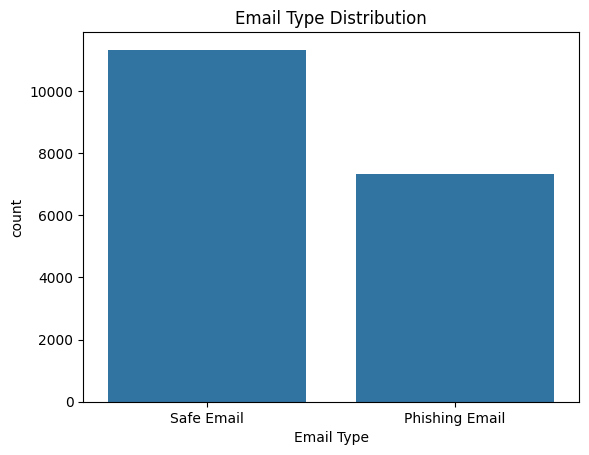

In [ ]:
sns.countplot(x='Email Type', data=df)
plt.title('Email Type Distribution')
plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
def evaluate_preds(y_true: np.array,
                   y_preds: np.array) -> dict:
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    return metric_dict

In [ ]:
# Support Vector Classifier model
svr_lin = LinearSVC(multi_class='ovr',C=1.0,loss='squared_hinge', dual=False)
svr_lin.fit(X_train, Y_train)

LinearSVC(dual=False)

In [ ]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers
svr_lin_predictions = svr_lin.predict(X_test)
report = classification_report(Y_test,svr_lin_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("yellow", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.990000,0.960000,0.970000,2209.000000
1,0.940000,0.980000,0.960000,1518.000000
accuracy,0.970000,0.970000,0.970000,0.970000
macro avg,0.960000,0.970000,0.970000,3727.000000
weighted avg,0.970000,0.970000,0.970000,3727.000000


In [ ]:
svr_lin_metrics = evaluate_preds(Y_test, svr_lin_predictions)

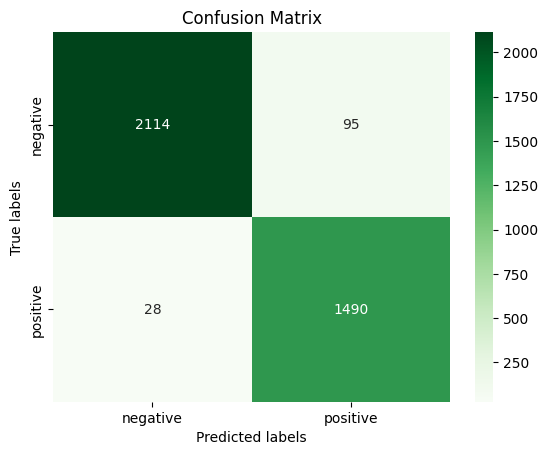

In [ ]:
# confusion matrix
svr_lin_predictions=svr_lin.predict(X_test)
ax= plt.subplot()
cm=confusion_matrix(Y_test,svr_lin_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Greens');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [ ]:
# Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
ranfrst_predictions = random_forest.predict(X_test)
report = classification_report(Y_test,ranfrst_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("red", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.980000,0.950000,0.970000,2209.000000
1,0.940000,0.970000,0.950000,1518.000000
accuracy,0.960000,0.960000,0.960000,0.960000
macro avg,0.960000,0.960000,0.960000,3727.000000
weighted avg,0.960000,0.960000,0.960000,3727.000000


In [ ]:
random_forest_metrics = evaluate_preds(Y_test, ranfrst_predictions)

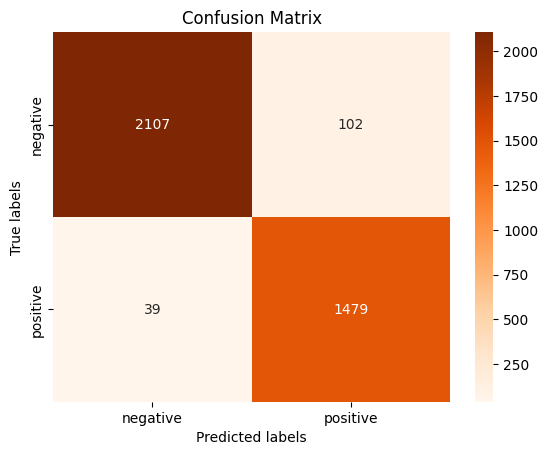

In [ ]:
# confusion matrix
ranfrst_predictions=random_forest.predict(X_test)
ax= plt.subplot()
cm=confusion_matrix(Y_test,ranfrst_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Oranges');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [ ]:
# K-Nearest Neighbor model
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers
knn_predictions = knn.predict(X_test)
report = classification_report(Y_test,knn_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("gray", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.880000,0.560000,0.680000,2209.000000
1,0.580000,0.890000,0.700000,1518.000000
accuracy,0.690000,0.690000,0.690000,0.690000
macro avg,0.730000,0.720000,0.690000,3727.000000
weighted avg,0.760000,0.690000,0.690000,3727.000000


In [ ]:
knn_metrics = evaluate_preds(Y_test, knn_predictions)

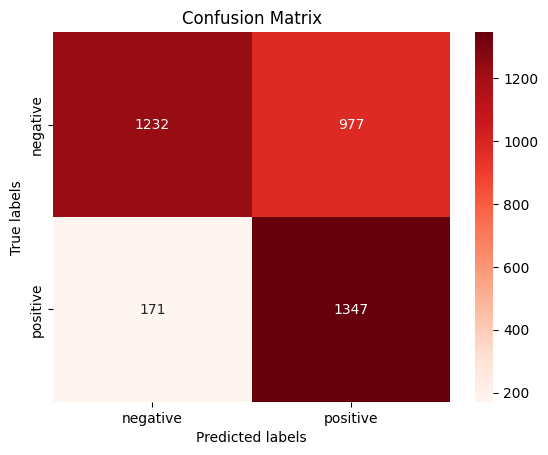

In [ ]:
# confusion matrix
knn_predictions=knn.predict(X_test)
ax= plt.subplot()
cm=confusion_matrix(Y_test,knn_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Reds');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [ ]:
# Logistic regression model
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers
lr_predictions = lr.predict(X_test)
report = classification_report(Y_test,lr_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("purple", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.980000,0.960000,0.970000,2209.000000
1,0.950000,0.970000,0.960000,1518.000000
accuracy,0.960000,0.960000,0.960000,0.960000
macro avg,0.960000,0.970000,0.960000,3727.000000
weighted avg,0.970000,0.960000,0.960000,3727.000000


In [ ]:
lr_metrics = evaluate_preds(Y_test, lr_predictions)

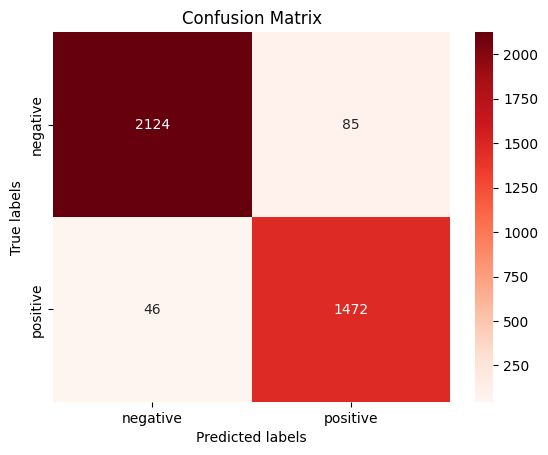

In [ ]:
# confusion matrix
lr_predictions=lr.predict(X_test)
ax= plt.subplot()
cm=confusion_matrix(Y_test,lr_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Reds');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [ ]:
# Naive Bayes model
nbm = naive_bayes.MultinomialNB()
nbm.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers
nbm_predictions = nbm.predict(X_test)
report = classification_report(Y_test,nbm_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("blue", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.940000,0.970000,0.950000,2209.000000
1,0.960000,0.900000,0.930000,1518.000000
accuracy,0.950000,0.950000,0.950000,0.950000
macro avg,0.950000,0.940000,0.940000,3727.000000
weighted avg,0.950000,0.950000,0.950000,3727.000000


In [ ]:
nbm_metrics = evaluate_preds(Y_test, nbm_predictions)

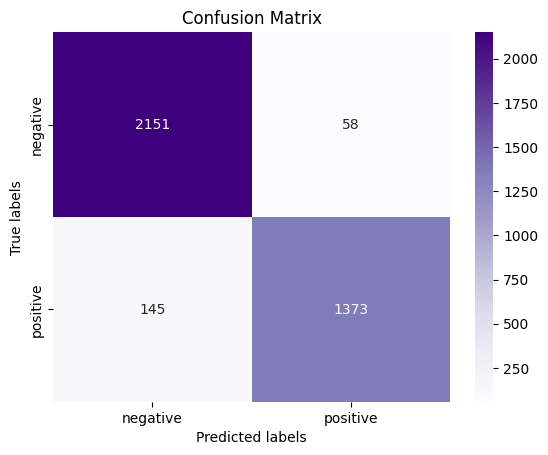

In [ ]:
# confusion matrix
nbm_predictions=nbm.predict(X_test)
ax= plt.subplot()
cm=confusion_matrix(Y_test,nbm_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Purples');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

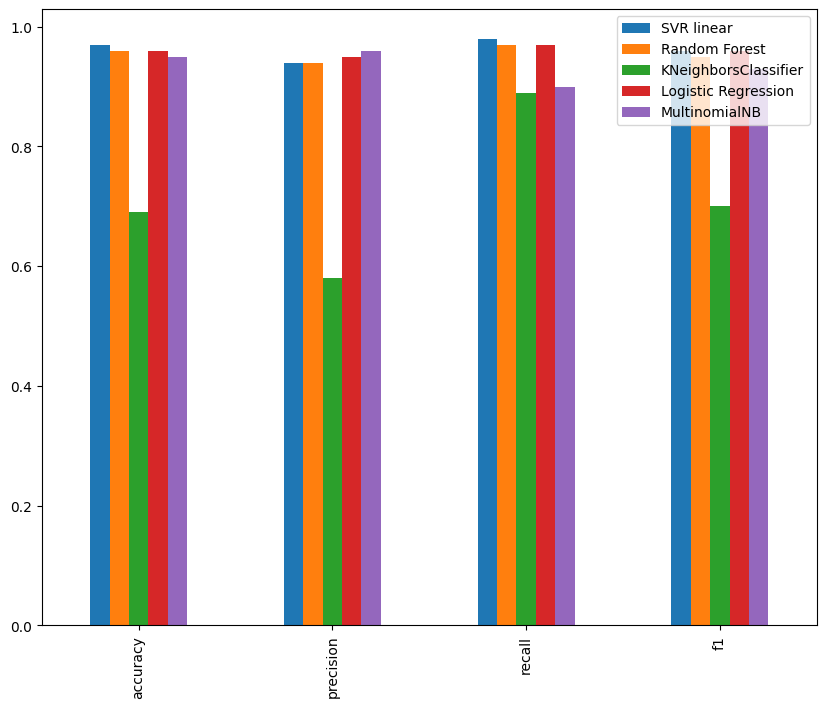

In [ ]:
compare_model = pd.DataFrame({"SVR linear": svr_lin_metrics,
                              "Random Forest": random_forest_metrics,
                              "KNeighborsClassifier": knn_metrics,
                              "Logistic Regression": lr_metrics,
                              "MultinomialNB": nbm_metrics})
compare_model.plot.bar(figsize=(10, 8))
plt.show()

In [ ]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],           # Range of regularization strengths
    'penalty': ['l1', 'l2'],                # Regularization types (depends on solver)
    'solver': ['liblinear', 'saga']         # Solvers that support l1 and l2 penalties
}


log_reg = LogisticRegression(max_iter=1000)

rand_search_lr = RandomizedSearchCV(log_reg, param_grid_lr, cv=5, scoring="accuracy")

rand_search_lr.fit(X_train, Y_train)

print("Best Parameters:", rand_search_lr.best_params_)
print(f"Best Score:{(rand_search_lr.best_score_)*100:.2f}%")

Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
Best Score:96.93%


In [ ]:
# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],           # Range of regularization strengths
    'penalty': ['l1', 'l2'],                # Regularization types (depends on solver)
    'solver': ['liblinear', 'saga']         # Solvers that support l1 and l2 penalties
}

# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000)

# Set up GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring="accuracy")

# Fit the model to the training data
grid_search_lr.fit(X_train, Y_train)

# Output the best parameters and best score for Logistic Regression
print("Logistic Regression Best Parameters:", grid_search_lr.best_params_)
print(f"Logistic Regression Best Score: {(grid_search_lr.best_score_)*100:.2f}%")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Best Score: 96.93%


In [ ]:
param_grid_svc = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],   # Wider range for regularization strengths
    'max_iter': [100, 200, 500, 1000],     # Various max iterations for convergence
    'tol': [1e-4, 1e-3, 1e-2, 1e-1],       # Different tolerances for stopping criteria
    'dual': [False],                       # Using primal formulation
}

# Initialize LinearSVC
linear_svc = LinearSVC()

# Set up RandomizedSearchCV
rand_search_svc = RandomizedSearchCV(linear_svc, param_grid_svc, cv=5, scoring="accuracy", n_iter=20, random_state=42)

# Fit the model to the training data
rand_search_svc.fit(X_train, Y_train)

# Output the best parameters and best score
print("Best Parameters:", rand_search_svc.best_params_)
print(f"Best Score: {(rand_search_svc.best_score_)*100:.2f}%")

Best Parameters: {'tol': 0.001, 'max_iter': 200, 'dual': False, 'C': 1}
Best Score: 96.85%


In [ ]:
param_grid_svc = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],   # Range of regularization strengths
    'max_iter': [100, 200, 500, 1000],     # Various max iterations for convergence
    'tol': [1e-4, 1e-3, 1e-2, 1e-1],       # Different tolerances for stopping criteria
}

# Initialize Linear SVC
linear_svc = LinearSVC()

# Set up GridSearchCV for Linear SVC
grid_search_svc = GridSearchCV(linear_svc, param_grid_svc, cv=5, scoring="accuracy")

# Fit the model to the training data
grid_search_svc.fit(X_train, Y_train)

# Output the best parameters and best score for Linear SVC
print("Linear SVC Best Parameters:", grid_search_svc.best_params_)
print(f"Linear SVC Best Score: {(grid_search_svc.best_score_)*100:.2f}%")

Linear SVC Best Parameters: {'C': 1, 'max_iter': 100, 'tol': 0.0001}
Linear SVC Best Score: 96.85%
